This is our notebook for data cleaning.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime as DAMN

In [6]:
def convert_to_datetime(row):
    dt = parser.parse(row["Date"])
    return dt

def label_month(row):
    dt = row["Datetime"]
    return dt.month

def label_hour(row):
    dt = row["Datetime"]
    return dt.hour

In [7]:
df = pd.read_csv("data.csv")
df.shape

(6456793, 22)

In [8]:
# Drop all data not within last 5 years
df = df[df['Year'].map(int) > 2013]
df.shape

(1016254, 22)

In [9]:
# Convert Date to Month and Hour
df["Datetime"] = df.apply(lambda row : convert_to_datetime(row), axis = 1)
df["Month"] = df.apply(lambda row : label_month(row), axis = 1)
df["Hour"] = df.apply(lambda row : label_hour(row), axis = 1)

df['sin_hour'] = np.sin(2*np.pi*df["Hour"]/24)
df['cos_hour'] = np.cos(2*np.pi*df["Hour"]/24)

df['sin_month'] = np.sin(2*np.pi*(df["Month"] - 1)/12)
df['cos_month'] = np.cos(2*np.pi*(df["Month"] - 1)/12)

In [10]:
# Drop unnecessary columns
df.drop(["ID", "Case Number", "Date", "IUCR", "FBI Code", "Location", "Year", "Datetime", "Month", "Hour", "Updated On"], inplace=True, axis=1)

In [11]:
df[:10]

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,sin_hour,cos_hour,sin_month,cos_month
1842704,0000X W ILLINOIS ST,BATTERY,SIMPLE,STREET,False,False,1831,18.0,42.0,8.0,1175688.0,1903592.0,41.890828,-87.630235,0.500000,0.866025,0.0,1.0
1842705,006XX N DEARBORN ST,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18.0,42.0,8.0,1175825.0,1904582.0,41.893542,-87.629702,0.000000,1.000000,0.0,1.0
1842712,052XX W RACE AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15.0,28.0,25.0,1141356.0,1903051.0,41.890046,-87.756333,0.000000,1.000000,0.0,1.0
1842713,053XX W WELLINGTON AVE,BATTERY,SIMPLE,APARTMENT,True,False,2514,25.0,31.0,19.0,1140319.0,1919430.0,41.935011,-87.759739,0.000000,1.000000,0.0,1.0
1842717,014XX W LEXINGTON ST,BATTERY,SIMPLE,STREET,False,False,1231,12.0,25.0,28.0,1166800.0,1896845.0,41.872509,-87.663069,0.000000,1.000000,0.0,1.0
1842718,064XX S ROCKWELL ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENTIAL YARD (FRONT/BACK),True,False,825,8.0,15.0,66.0,1160145.0,1861909.0,41.776780,-87.688465,0.000000,1.000000,0.0,1.0
1842720,016XX N MENARD AVE,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,False,False,2531,25.0,29.0,25.0,1137502.0,1910357.0,41.910165,-87.770311,0.000000,1.000000,0.0,1.0
1842721,064XX S CENTRAL PARK AVE,NARCOTICS,POSS: COCAINE,SIDEWALK,True,False,823,8.0,13.0,65.0,1153430.0,1861514.0,41.775832,-87.713093,0.258819,0.965926,0.0,1.0
1842722,002XX S LOCKWOOD AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,1522,15.0,29.0,25.0,1141041.0,1898610.0,41.877865,-87.757599,0.000000,1.000000,0.0,1.0
1842724,026XX E 78TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,421,4.0,7.0,43.0,1195482.0,1853767.0,41.753638,-87.559192,0.258819,0.965926,0.0,1.0


In [12]:
df.shape

(1016254, 18)

In [13]:
# Drop rows with crime type that we don't think matter
df = df[
    (df["Primary Type"] != "GAMBLING") &
    (df["Primary Type"] != "LIQUOR LAW VIOLATION") &
    (df["Primary Type"] != "PROSTITUTION") &
    (df["Primary Type"] != "NARCOTICS") &
    (df["Primary Type"] != "PUBLIC INDECENCY") 
    ]

In [14]:
df.shape

(934538, 18)

In [15]:
df.dropna(inplace = True)

In [16]:
df.shape

(904790, 18)

In [17]:
# Convert district to int and arrest and domestic to binary 0, 1 value
df[["District", "Ward", "Beat", "Community Area", "X Coordinate", "Y Coordinate"]] = df[["District", "Ward", "Beat", "Community Area", "X Coordinate", "Y Coordinate"]].astype(int)
df[["Latitude", "Longitude"]] = df[["Latitude", "Longitude"]].astype(float)
df[["Arrest", "Domestic"]] = df[["Arrest", "Domestic"]].astype(int)

In [18]:
df.shape

(904790, 18)

In [19]:
df[:10]

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,sin_hour,cos_hour,sin_month,cos_month
1842704,0000X W ILLINOIS ST,BATTERY,SIMPLE,STREET,0,0,1831,18,42,8,1175688,1903592,41.890828,-87.630235,0.5,0.866025,0.0,1.0
1842705,006XX N DEARBORN ST,THEFT,FROM BUILDING,BAR OR TAVERN,0,0,1832,18,42,8,1175825,1904582,41.893542,-87.629702,0.0,1.000000,0.0,1.0
1842712,052XX W RACE AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,0,0,1523,15,28,25,1141356,1903051,41.890046,-87.756333,0.0,1.000000,0.0,1.0
1842713,053XX W WELLINGTON AVE,BATTERY,SIMPLE,APARTMENT,1,0,2514,25,31,19,1140319,1919430,41.935011,-87.759739,0.0,1.000000,0.0,1.0
1842717,014XX W LEXINGTON ST,BATTERY,SIMPLE,STREET,0,0,1231,12,25,28,1166800,1896845,41.872509,-87.663069,0.0,1.000000,0.0,1.0
1842718,064XX S ROCKWELL ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENTIAL YARD (FRONT/BACK),1,0,825,8,15,66,1160145,1861909,41.776780,-87.688465,0.0,1.000000,0.0,1.0
1842720,016XX N MENARD AVE,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,0,0,2531,25,29,25,1137502,1910357,41.910165,-87.770311,0.0,1.000000,0.0,1.0
1842725,042XX W WILCOX ST,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENTIAL YARD (FRONT/BACK),1,0,1115,11,28,26,1148126,1898998,41.878797,-87.731575,0.0,1.000000,0.0,1.0
1842727,018XX N KEDVALE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,1,1,2534,25,30,20,1148430,1911869,41.914110,-87.730126,0.0,1.000000,0.0,1.0
1842728,014XX N LOREL AVE,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENTIAL YARD (FRONT/BACK),0,0,2532,25,37,25,1140427,1909002,41.906394,-87.759599,0.0,1.000000,0.0,1.0


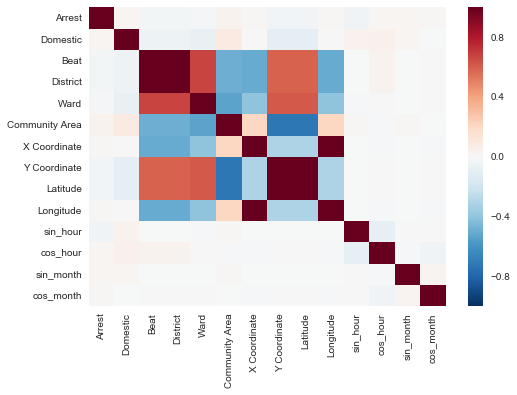

In [20]:
sns.heatmap(df.corr())
plt.show()

In [21]:
df.to_csv('crime.csv')